# Matplotlib and Seaborn basics with Bike dataset, taskset 6

## Preparing libs and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(6)   # set rng
plt.rcParams["figure.figsize"] = (16, 8)   # display of plots
file_path = './bike.csv'

df = pd.read_csv(file_path)
df.columns = df.columns.map(lambda x: str.lower(x))
df.set_index("id", inplace=True)
df.head()

,marital status,gender,income,children,education,occupation,home owner,cars,commute distance,region,age,purchased bike
id,,,,,,,,,,,,
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


## Task 1. Create bar charts for:
- amount of buyers of different professions
- medium income of buyers
- medium age of buyers, split in who bought bike and non-bought

<AxesSubplot:xlabel='occupation', ylabel='count'>

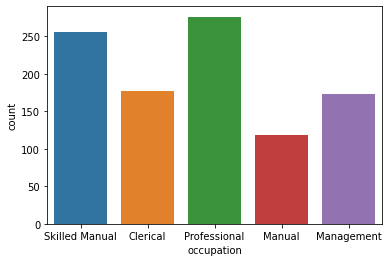

In [4]:
sns.countplot(data=df, x='occupation')

<AxesSubplot:xlabel='occupation', ylabel='income'>

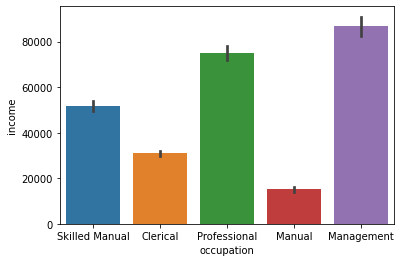

In [5]:
sns.barplot(data=df, x='occupation', y='income')

<AxesSubplot:xlabel='occupation', ylabel='age'>

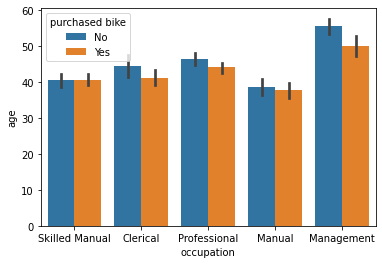

In [6]:
sns.barplot(data=df, x='occupation', y='age', hue='purchased bike')

## Task 2. Create histogram of children amount (general and bought-dependent)

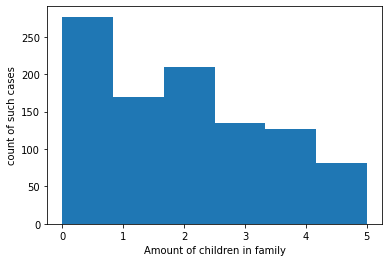

In [7]:
plt.hist(df['children'], bins=df['children'].nunique())  # all children
plt.xlabel('Amount of children in family')
plt.ylabel('count of such cases')
plt.show()

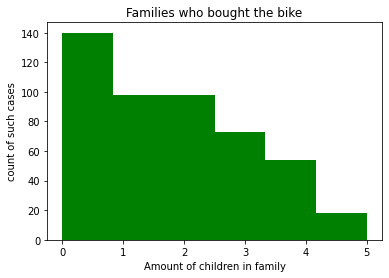

In [13]:
plt.hist(
    df['children'][df['purchased bike'] == 'Yes'],
    bins=df['children'].nunique(),
    color='green',
)
plt.title('Families who bought the bike')
plt.xlabel('Amount of children in family')
plt.ylabel('count of such cases')
plt.show()

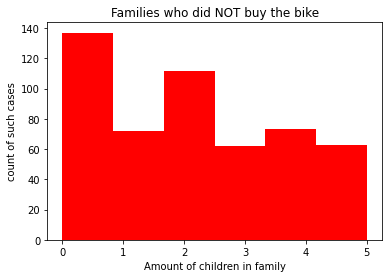

In [12]:
plt.hist(
    df['children'][df['purchased bike'] == 'No'],
    bins=df['children'].nunique(),
    color='red',
)
plt.title('Families who did NOT buy the bike')
plt.xlabel('Amount of children in family')
plt.ylabel('count of such cases')
plt.show()

## Task 3. Box-plot of income (general, education-dependent)

[Text(0.5, 1.0, 'General')]

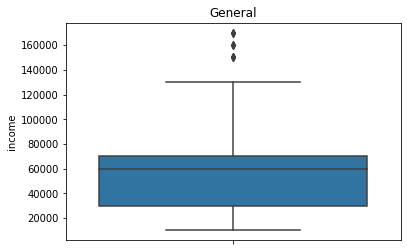

In [15]:
# Outliers (выбросы) can be seen above 140000 of income
sns.boxplot(data=df, y='income').set(title='General')

<AxesSubplot:xlabel='education', ylabel='income'>

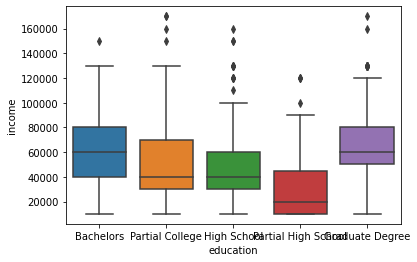

In [16]:
sns.boxplot(data=df, x='education', y='income')
# Outliers:
# Bachelors - over 140k 
# Partial College - over 140k 
# High School - over 100k 
# Partial High School - over 100k 
# Graduate - over 120k 

## Task 4. Create scatter diagram for:
- income and age
- children amount and cars amount

<AxesSubplot:xlabel='income', ylabel='age'>

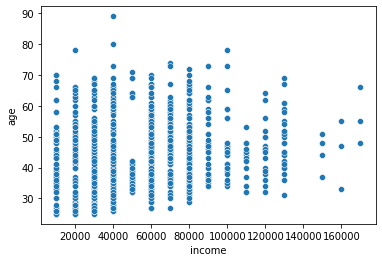

In [19]:
sns.scatterplot(data=df, x='income', y='age')
# derivation: income over 140k is rare and not seen 
# with people older than 70 yrs

<AxesSubplot:xlabel='cars', ylabel='children'>

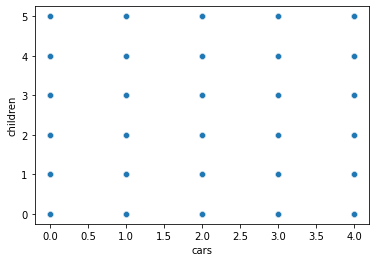

In [20]:
sns.scatterplot(data=df, x='cars', y='children')

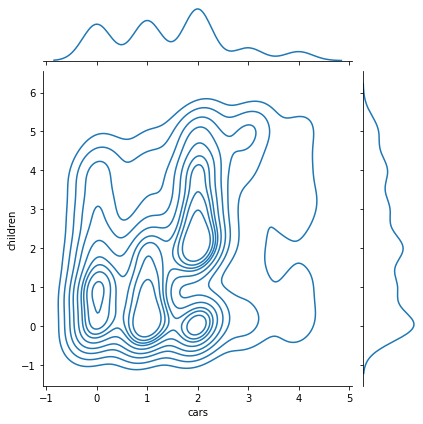

In [26]:
sns.jointplot(data=df, x='cars', y='children', kind='kde')

[Text(0.5, 15.0, 'cars amount'), Text(33.0, 0.5, 'children amount')]

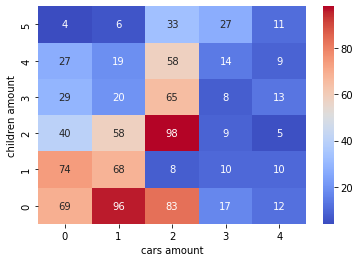

In [27]:
temp = np.zeros((df["children"].nunique(), df["cars"].nunique()))
for index, row in df.iterrows():
    temp[row["children"], row["cars"]] += 1

sns.heatmap(
    temp[::-1], 
    yticklabels=list(range(temp.shape[0] - 1, -1, -1)), 
    annot=True, 
    cmap="coolwarm"
).set(xlabel="cars amount", ylabel="children amount")

# As we can see, the most frequent cases are:
# 0 children, 1 car
# 2 children, 2 cars